# WandB Sweep Analysis

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import wandb

In [26]:
def get_runs_by_tag(project: str, tag: str, entity: str | None = None) -> pd.DataFrame:
    """Get ALL runs with a tag, regardless of state."""
    api = wandb.Api()
    path = f"{entity}/{project}" if entity else project

    # Get ALL runs with this tag
    filters = {"tags": {"$in": [tag]}}
    runs = api.runs(path, filters=filters)

    data = []
    for run in runs:
        row = {
            "run_id": run.id,
            "run_name": run.name,
            "state": run.state,
            "tags": run.tags,
            "url": run.url,
        }

        # Add all config parameters
        for key, value in run.config.items():
            row[f"config.{key}"] = value

        # Add all summary metrics
        for key, value in run.summary.items():
            if not key.startswith("_"):
                row[f"summary.{key}"] = value

        data.append(row)

    df = pd.DataFrame(data)

    if len(df) == 0:
        print(f"No runs found with tag '{tag}'")
    else:
        print(f"Found {len(df)} runs with tag '{tag}'")
        print(f"States: {df['state'].value_counts().to_dict()}")

    return df

In [29]:
# Get your runs
df1 = get_runs_by_tag(
    project="spd",
    tag="run_20250916_001604",  # Your tag
    entity="goodfire",
)

df2 = get_runs_by_tag(
    project="spd",
    tag="run_20250915_204002",  # Your tag
    entity="goodfire",
)

df = pd.concat([df1, df2], ignore_index=True)

Found 4 runs with tag 'run_20250916_001604'
States: {'finished': 4}
Found 10 runs with tag 'run_20250915_204002'
States: {'finished': 10}


In [35]:
df

,run_id,run_name,state,tags,url,config.C,config.batch_size,config.ci_alive_threshold,config.dist_backend,config.embedding_recon_coeff,...,summary.train/model.layers.3.mlp.up_proj/n_alive_0.0,summary.train/model.layers.3.self_attn.k_proj/l0,summary.train/model.layers.3.self_attn.k_proj/n_alive_0.0,summary.train/model.layers.3.self_attn.o_proj/l0,summary.train/model.layers.3.self_attn.o_proj/n_alive_0.0,summary.train/model.layers.3.self_attn.q_proj/l0,summary.train/model.layers.3.self_attn.q_proj/n_alive_0.0,summary.train/model.layers.3.self_attn.v_proj/l0,summary.train/model.layers.3.self_attn.v_proj/n_alive_0.0,summary.train/loss/stochastic_recon_subset
0,nq1weljb,ss_llama_sans_bal-importance_minimality_coeff-...,finished,"[lm, run_20250916_001604, ss_llama_sans_bal]",https://wandb.ai/goodfire/spd/runs/nq1weljb,2000,24,0,None,None,...,540,1.728597,1199,4.910726,177,1.557048,232,3.742839,1907,NaN
1,9ps3h1q0,ss_llama_sans_bal-importance_minimality_coeff-...,finished,"[lm, run_20250916_001604, ss_llama_sans_bal]",https://wandb.ai/goodfire/spd/runs/9ps3h1q0,2000,24,0,None,None,...,874,2.527507,399,12.527751,661,2.429525,273,8.446289,1773,NaN
2,ie7a24x4,ss_llama_subset_sans_bal_simple-importance_min...,finished,"[lm, run_20250916_001604, ss_llama_subset_sans...",https://wandb.ai/goodfire/spd/runs/ie7a24x4,2000,24,0,None,None,...,1993,2.011230,1034,9.638347,1807,2.013509,271,6.695312,1920,0.157217
3,vffk4qto,ss_llama_subset_sans_bal_simple-importance_min...,finished,"[lm, run_20250916_001604, ss_llama_subset_sans...",https://wandb.ai/goodfire/spd/runs/vffk4qto,2000,24,0,None,None,...,1973,3.331625,459,23.876953,403,3.278076,138,14.458578,992,0.087675
4,tzr9hs6f,ss_llama_sans_base-importance_minimality_coeff...,finished,"[lm, run_20250915_204002, ss_llama_sans_base]",https://wandb.ai/goodfire/spd/runs/tzr9hs6f,2000,24,0,None,None,...,1448,3.012777,672,17.493734,1554,3.060466,541,11.439209,1961,NaN
5,sbj6592x,ss_llama_sans_base-importance_minimality_coeff...,finished,"[lm, run_20250915_204002, ss_llama_sans_base]",https://wandb.ai/goodfire/spd/runs/sbj6592x,2000,24,0,None,None,...,953,2.089925,982,7.387207,569,1.820394,374,5.158447,1904,NaN
6,sis0juek,ss_llama_sans_base-importance_minimality_coeff...,finished,"[lm, run_20250915_204002, ss_llama_sans_base]",https://wandb.ai/goodfire/spd/runs/sis0juek,2000,24,0,None,None,...,1317,5.264404,1101,40.432701,1986,5.850993,906,25.988363,1642,NaN
7,25i6dpvw,ss_llama_subset_sans-importance_minimality_coe...,finished,"[lm, run_20250915_204002, ss_llama_subset_sans]",https://wandb.ai/goodfire/spd/runs/25i6dpvw,2000,24,0,None,None,...,1994,2.420654,1376,13.977051,723,2.246582,448,8.204997,1818,0.140942
8,sk9ufrel,ss_llama_subset_bal_sans-importance_minimality...,finished,"[lm, run_20250915_204002, ss_llama_subset_bal_...",https://wandb.ai/goodfire/spd/runs/sk9ufrel,2000,24,0,None,None,...,1994,3.044271,693,20.508953,1735,3.036052,285,12.334799,1016,0.083556
9,isycf65s,ss_llama_subset_bal_sans-importance_minimality...,finished,"[lm, run_20250915_204002, ss_llama_subset_bal_...",https://wandb.ai/goodfire/spd/runs/isycf65s,2000,24,0,None,None,...,1993,1.907145,1373,8.085368,1890,1.757324,420,5.100993,1968,0.146628


In [37]:
df['plot_group'].unique()

array(['ss_llama_sans_bal', 'ss_llama_subset_sans_bal_simple',
       'ss_llama_sans_base', 'ss_llama_subset_sans',
       'ss_llama_subset_bal_sans'], dtype=object)

In [40]:
group_name_dict = {
    "ss_llama_sans_base": "baseline",
    "ss_llama_sans_bal": "baseline + bal",
    "ss_llama_subset_bal_sans": "subset + bal",
    "ss_llama_subset_sans": "subset",
    'ss_llama_subset_sans_bal_simple': 'subset(simple p) + bal',
}
df['plot_group'] = df['run_name'].apply(lambda x: group_name_dict[x.split('-')[0]])

In [61]:
[c for c in df.columns if 'faith' in c]

['config.faithfulness_coeff', 'summary.train/loss/faithfulness']

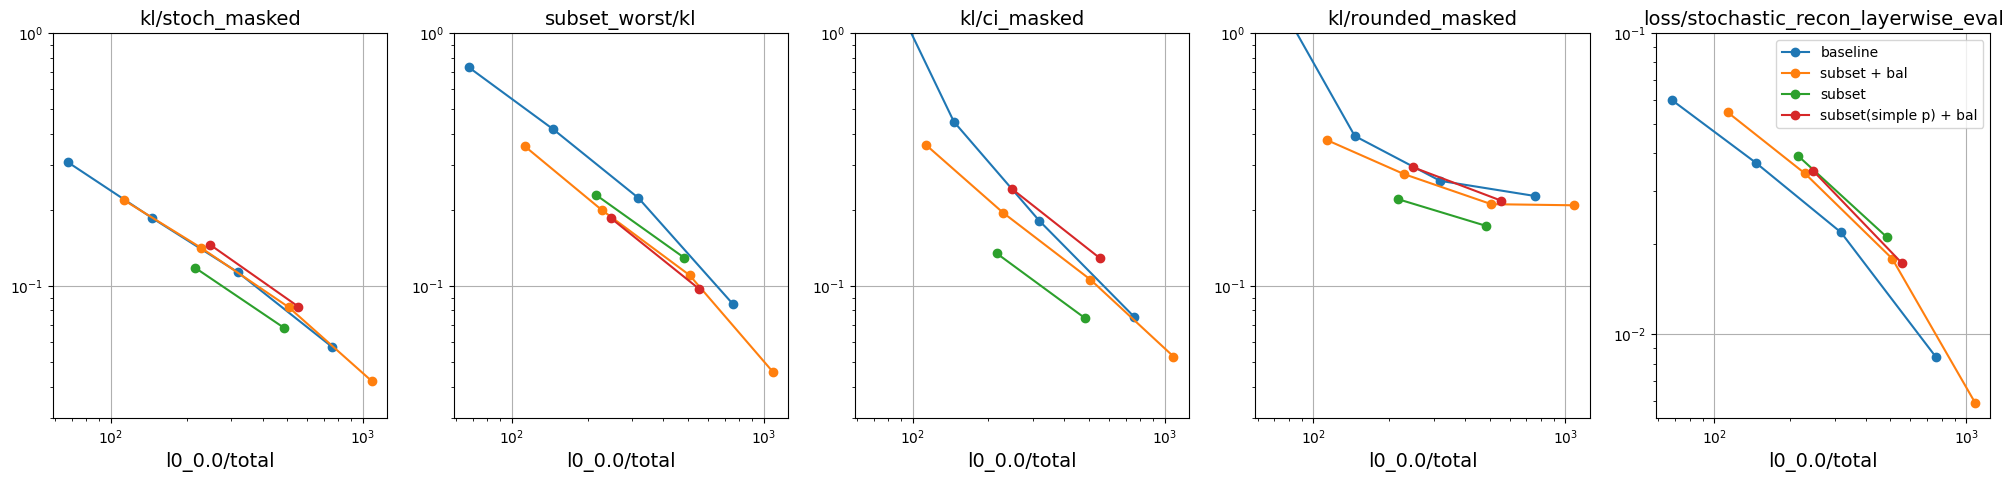

In [65]:
x_metric = 'summary.eval/l0_0.0/total'
y_metrics = ['summary.eval/kl/stoch_masked', 'summary.eval/subset_worst/kl', 'summary.eval/kl/ci_masked', 'summary.eval/kl/rounded_masked','summary.eval/loss/stochastic_recon_layerwise_eval']

fig, ax = plt.subplots(1, len(y_metrics), figsize=(len(y_metrics)*5, 5), sharey=False)

# Track handles for custom legend
legend_handles = []

for i, y_metric in enumerate(y_metrics):
    for group in ['baseline','subset + bal',  'subset', 'subset(simple p) + bal']:
        plot_df = df[df['plot_group'] == group].sort_values(x_metric)
        ax[i].plot(plot_df[x_metric], plot_df[y_metric], '-o',
                   label=group)  # No auto label
    
    ax[i].set_xlabel(x_metric.replace('summary.eval/', ''), fontsize=14)
    ax[i].set_title('/'.join(y_metric.split('/')[-2:]), fontsize=14)
    ax[i].grid(True)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')

    if 'layerwise' in y_metric:
        ax[i].set_ylim(None, .1)
    else:
        ax[i].set_ylim(.03, 1)
    
plt.legend()


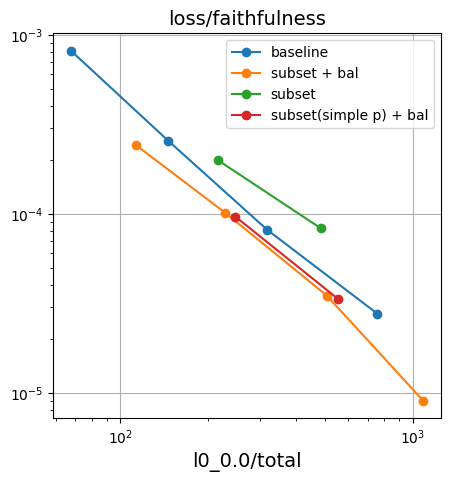

In [64]:
x_metric = 'summary.eval/l0_0.0/total'
y_metrics = ['summary.train/loss/faithfulness']

fig, ax = plt.subplots(1, len(y_metrics), figsize=(len(y_metrics)*5, 5), sharey=False)
if len(y_metrics) == 1:
    ax = [ax]
# Track handles for custom legend
legend_handles = []

for i, y_metric in enumerate(y_metrics):
    for group in ['baseline', 'subset + bal', 'subset', 'subset(simple p) + bal']:
        plot_df = df[df['plot_group'] == group].sort_values(x_metric)
        ax[i].plot(plot_df[x_metric], plot_df[y_metric], '-o',
                   label=group)  # No auto label
    
    ax[i].set_xlabel(x_metric.replace('summary.eval/', ''), fontsize=14)
    ax[i].set_title('/'.join(y_metric.split('/')[-2:]), fontsize=14)
    ax[i].grid(True)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')

    
plt.legend()


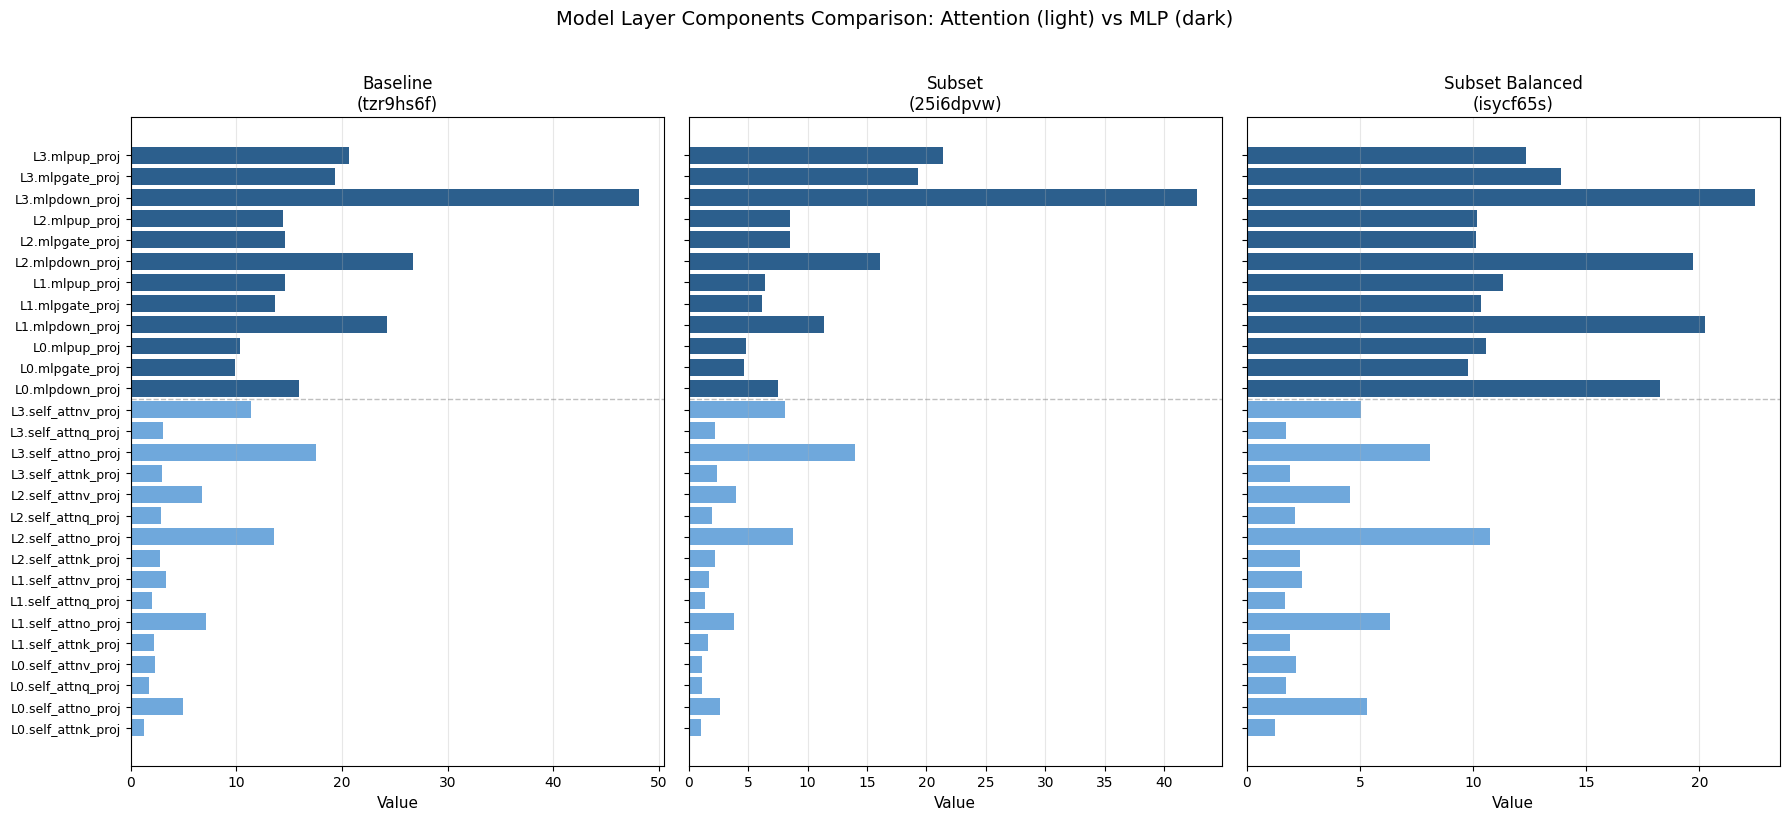

In [33]:
import re
import numpy as np

run_ids = {
    'Baseline': 'tzr9hs6f',
    'Subset': '25i6dpvw',
    'Subset Balanced': 'isycf65s'
}

# Create subplots - 3 columns for side-by-side comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

for idx, (run_name, run_id) in enumerate(run_ids.items()):
    ax = axes[idx]
    
    row = df[df['run_id'] == run_id].iloc[0]
    
    # Filter columns matching the pattern
    pattern = r'summary\.eval/l0_[0-9.]+/model\.layers\.\d+\.'
    matching_cols = [col for col in row.index if re.match(pattern, col)]
    filtered_data = row[matching_cols]
    
    # Separate attention and MLP components and sort by layer number
    attn_data = []
    mlp_data = []
    
    for col in filtered_data.index:
        match = re.search(r'model\.layers\.(\d+)\.(.+)$', col)
        if match:
            layer_num = int(match.group(1))
            component = match.group(2).replace('.', '')
            value = filtered_data[col]
            
            if 'self_attn' in col:
                attn_data.append((layer_num, f'L{layer_num}.{component}', value))
            elif 'mlp' in col:
                mlp_data.append((layer_num, f'L{layer_num}.{component}', value))
    
    # Sort by layer number
    attn_data.sort(key=lambda x: (x[0], x[1]))
    mlp_data.sort(key=lambda x: (x[0], x[1]))
    
    # Combine data: attention on top, MLP on bottom
    all_data = attn_data + mlp_data
    labels = [item[1] for item in all_data]
    values = [item[2] for item in all_data]
    
    # Create color array: lighter blue for attention, darker blue for MLP
    colors = ['#6FA8DC'] * len(attn_data) + ['#2C5F8D'] * len(mlp_data)
    
    # Create the horizontal bar chart
    bars = ax.barh(range(len(all_data)), values, color=colors)
    
    # Only show y-axis labels on the leftmost plot
    if idx == 0:
        ax.set_yticks(range(len(all_data)))
        ax.set_yticklabels(labels, fontsize=9)
    
    ax.set_xlabel('Value', fontsize=11)
    ax.set_title(f'{run_name}\n({run_id})', fontsize=12)
    
    # Add a separator line between attention and MLP
    if len(attn_data) > 0 and len(mlp_data) > 0:
        ax.axhline(y=len(attn_data)-0.5, color='gray', linestyle='--', alpha=0.5, linewidth=1)
    
    ax.grid(axis='x', alpha=0.3)

# Add overall title
fig.suptitle('Model Layer Components Comparison: Attention (light) vs MLP (dark)', fontsize=14, y=1.02)

plt.tight_layout()
plt.show()